# CIFAR 10 with a MLP in PyTorch
We return to our problem form last week and try to optimize our solution:
* use TensorBoard to visualize the training
* try different Losses
* try different Optimizers 
* try different hyper-parameters

In [ ]:
!pip install torch torchvision

In [ ]:
#imports
import torch
import torchvision
import torchvision.transforms as transforms

## Get CIFAR
Use PyTorch Data Loaders (more next week) to get data batches

In [ ]:
#transform input data (image) to tensor
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#set batch size
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


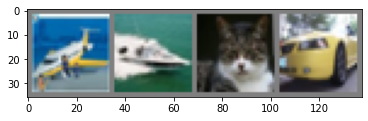

plane ship  cat   car  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter) #get data from loader!

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Assignment
* design MLP to classify CIFAR10

### E1 use TensorBoard to visualize the training

### E2 try two different Losses

### E3 try two different Optimizers
* SGD with Momentum
* AdaGrad or Adam

### E4 implement a learning rate schedule
* use SGD with Momentung as Optimizer
* use a Multi-step schedule

### Notes:
* USE THE GPU! -> need to transfer the model and data to the GPU
* MLP take 1D input - CIFAR imges are 2D -> first operator of your net needs to flatten the image
* CIFAR is a multi class problem: use a SOFTMAX layer to output vector of class propabilities -> user argmax to get the class lable
* Start small: use a small net with a reducet training set and a few epochs to test your setup 